#Importing the Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix





# Loading the Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('/content/drive/My Drive/Data/features_3_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [6]:
data.columns


Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

#Data Preprocessing

In [4]:
#to make sure output is binary or multiclass
data['label'].value_counts()

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

###Exploratory Data Analysis

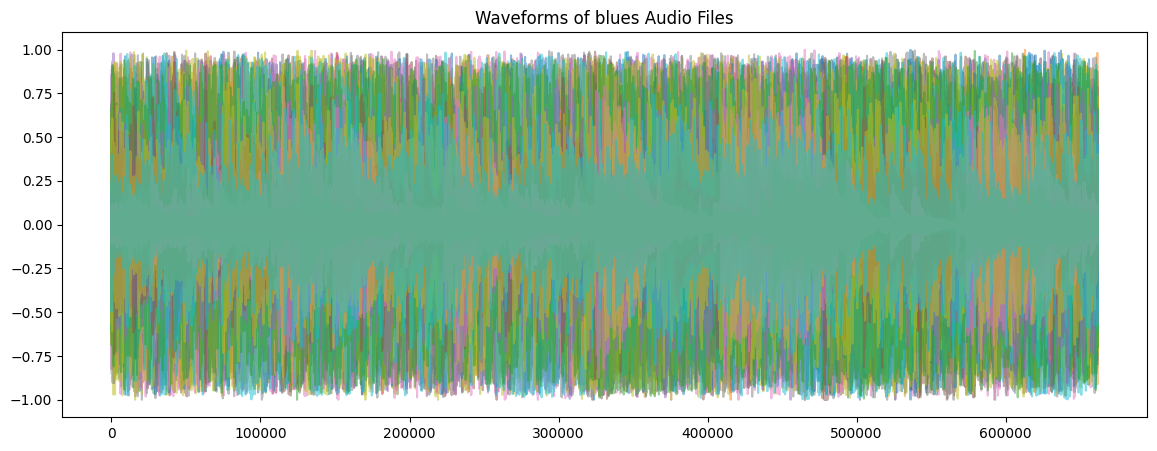

<ipython-input-7-b768dfcf3faa>:20: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(os.path.join('/content/drive/My Drive/Data/genres_original/', genre, audio_file))
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Could not load file jazz.00054.wav: 


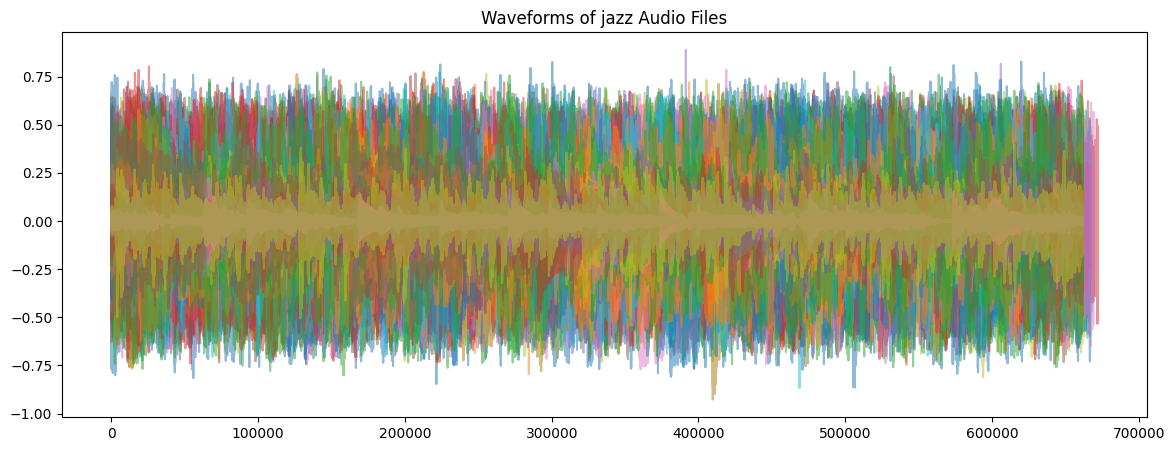

In [ ]:
import os
import librosa
import matplotlib.pyplot as plt

# List of genres
genres = ['blues', 'jazz', 'metal', 'pop', 'reggae', 'disco', 'classical', 'hiphop', 'rock', 'country']

# Loop over each genre
for genre in genres:
    # Get a list of all the audio files in the genre directory
    audio_files = os.listdir(os.path.join('/content/drive/My Drive/Data/genres_original/', genre))

    # Create a new figure for each genre
    plt.figure(figsize=(14, 5))

    # Loop over each audio file in the genre directory
    for audio_file in audio_files:
        try:
            # Load the audio file
            y, sr = librosa.load(os.path.join('/content/drive/My Drive/Data/genres_original/', genre, audio_file))

            # Plot the waveform
            plt.plot(y, alpha=0.5)
        except Exception as e:
            print(f"Could not load file {audio_file}: {e}")

    # Add a title and show the plot
    plt.title(f'Waveforms of {genre} Audio Files')
    plt.show()


#Data Preprocessing

###Data Spliting

In [6]:
X = data.drop(columns=['filename', 'label', 'length'])  # Drop non-feature columns
y = data['label']


###Data Normalization

In [8]:
# normalize the dataset

scaler = StandardScaler()
X = scaler.fit_transform(X)


###Label Encoder

In [10]:
# Convert labels to one-hot encoded vectors.

encoder = LabelEncoder()
y = to_categorical(encoder.fit_transform(y))


###Data Split

In [14]:

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting training data into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


#Data Modelling

In [16]:
# Model architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Assuming 10 genres


###Model Training

In [20]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/15
200/200 [==============================] - 4s 6ms/step - loss: 0.0421 - accuracy: 0.9862 - val_loss: 0.5369 - val_accuracy: 0.8949
Epoch 2/15
200/200 [==============================] - 1s 5ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.6998 - val_accuracy: 0.8724
Epoch 3/15
200/200 [==============================] - 1s 4ms/step - loss: 0.0866 - accuracy: 0.9739 - val_loss: 0.5896 - val_accuracy: 0.8712
Epoch 4/15
200/200 [==============================] - 1s 3ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.5797 - val_accuracy: 0.8968
Epoch 5/15
200/200 [==============================] - 1s 3ms/step - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.5870 - val_accuracy: 0.8881
Epoch 6/15
200/200 [==============================] - 1s 3ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.5877 - val_accuracy: 0.8887
Epoch 7/15
200/200 [==============================] - 1s 3ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.5890 - val_accuracy: 0.8987
Epoch 

#Model Evaluation

In [23]:
# Predicting on the Test Set:
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
y_true_labels = y_test.argmax(axis=1)


63/63 [==============================] - 0s 1ms/step


In [26]:

# Calculate metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")




Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


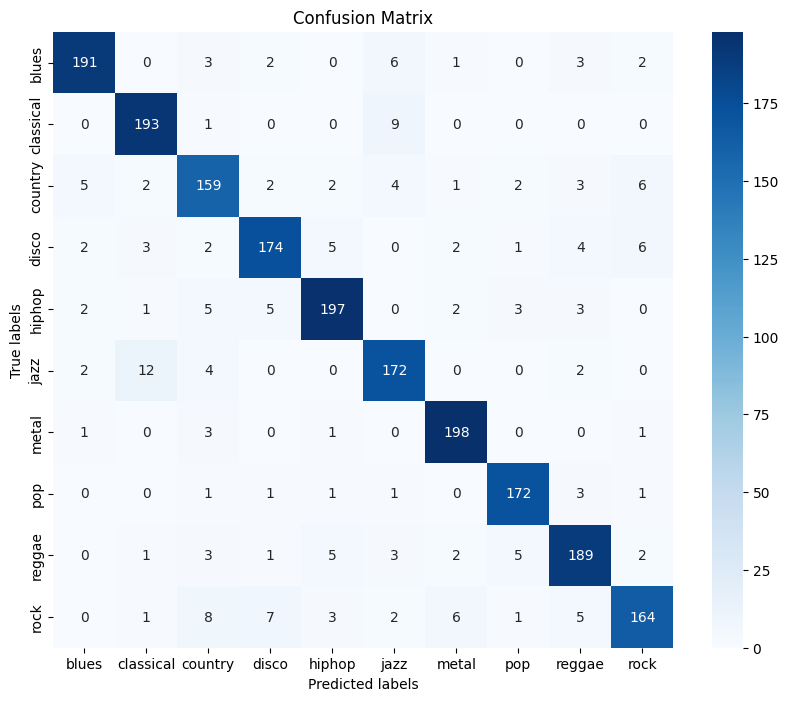

In [27]:

# Calculate confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
